# "Fun with Loot Boxes" Lab

> Authors: Caroline Schmitt, Matt Brems, Mahdi Shadkam-Farrokhi

## Learning objectives
- Students will be able to describe the difference between discrete and continuous distributions
- Students will be able to describe probability mass functions and cumulative distribution functions
- Students will be able to implement probability simulations

## Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="assets/box.png" alt="loot box" width="150"/> 

#### What is a Loot Box?

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

### Scenario Details
In our specific game, loot boxes can be obtained in one of two ways: 
- Every three hours of playing the game, a user automatically earns one free loot box
- A user can purchase a loot box for $1 (in real money!)

These loot boxes are very good for our business because if a player earns a loot box, it means they are either spending lots of time on the game (leading to advertisement revenue) or are directly paying the studio ($1 per loot box).

### What's in a loot box?

A loot box will contain either a __character__, the most desired game component, or gems, an in-game currency that is inconsequential. Whether each loot box contains a character or gems is __random__. 

The current loot box probability configurations are listed below:
- The __chance of getting a character from a loot box is 15%__
- Characters have the following proportions by rarity:
    - 1% super rare characters
    - 9% rare characters
    - 30% uncommon characters
    - 60% common characters
    - _For example, IF a player receives a character, there is a 1% chance it will be a super rare character_

Our boss is a non-technical person, who will not understand "mathy" or technical jargon. When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many characters will they get?" How would you respond?

**Answer**:

If every loot box has 15% chance to have a character, a user can expect to have 15 characters for 100 loot boxes. 
We just need to multiply the number of loot boxes by the amount of percentage.

#### 2. Our boss asks, "How many loot boxes does someone have to get in order to definitely get a character?" How would you respond?

**Answer**:

Since each loot box has a 15% chance of containing a character, there's no specific number of boxes that guarantees a player will get a character. However, the more loot boxes a player opens, the higher their chances of getting a character. But remember, it's all about chance; there's always a possibility, however small, that they might not get a character even after opening many boxes.

### Quick Distribution Review
Recall that the __Discrete Uniform Distribution__ is used when:
- We have a discrete set of outcomes
- Each outcome is equally likely
- _For example: You're one out of 100 students and the teacher is assigning each student a number from 1-100. The random variable is the number you're assigned. The assignment is completey at random, so each outcome from 1-100 is equally likely._

Recall that a __Binomial Distribution__ is used when:
- There is a binary outcome (either success or failure) in sequence as a number of trials giving a total count of successes
- There is a constant probability of success $p$
- _For example: You're tossing darts at a board. You have 6 darts (6 trials), each having a 20% chance of hitting the target ($p=.2$). The random variable is the total number of successful dart hits. The possible outcomes are 0-6 hits._

Recall that a __Bernoulli Distribution__ is used when:
- There is a binary outcome (either success or failure) with a single trial
    - The Bernoulli Distribution is a special case of the Binomial Distribution in that the number of trials per experiment is 1
- There is a constant probability of success $p$
- _For example: Each lottery ticket has a 1 in 1 million chance of winning (success). The random variable is the result from buying 1 ticket. The number of trials is one (one ticket) where each trial has a 1 in 1 million chance of success ($p = \frac{1}{1,000,000}$). There are only 2 possible outcomes, either winning the lottery (success) or not (failure)._

Recall that a __Poisson Distribution__ is used when:
- The number of successes is is a non-negative integer
- Events occur independently
- The rate at which events occur is constant
- Two events cannot occur at exactly the same instant
- The probability of an event occurring in an interval is proportional to the length of the interval
- _For example: You have a retail business where customers come through a door. From experience, you know on average 10 customers walk through the door every hour ($\lambda = 10$). The random variable is the number of customers that will walk through the door in the next hour (NOTE: the time interval of 1 hour is the same). The possible outcomes are $0-\infty$._


#### 3a. Let's suppose a random variable $X$ counts up how many characters are observed out of 100 loot boxes. Why is $X$ a discrete random variable?

**Answer**:

X is a discrete random variable because it represents a count of occurrences (characters in loot boxes) within a finite, clearly defined range of whole numbers.

#### 3b. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting a character a "success" and not getting a character as a "failure." 

**Answer**:

X is best modeled by a Binomial Distribution because it counts the number of successes (characters obtained) in a fixed number of independent trials (loot boxes opened), each with the same probability of success.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets 20 characters?"

_Let's use a simulation to answer the boss' question._

### Using simulations to construct a distribution

#### Build the `random_character` function

The function takes no arguments and returns a string denoting a character's rarity (`'super rare character'`, `'rare character'`, `'uncommon character'`, `'common character'`) in the given proportions:
- 1% of the time, the function returns `'super rare character'`
- 9% of the time, the function returns `'rare character'`
- 30% of the time, the function returns `'uncommon character'`
- 60% of the time, the function returns `'common character'`

_HINT: Consider using `np.random.choice()` method with the `p` parameter_

In [1]:
import numpy as np

In [2]:
def random_character():
    # Possible rarities
    rarities = ['super rare character', 'rare character', 'uncommon character', 'common character']

    # Probabilities for each rarity
    probabilities = [0.01, 0.09, 0.30, 0.60]

    # Choose a rarity based on the given probabilities
    return np.random.choice(rarities, p=probabilities)

In [3]:
def simulate_loot_boxes(num_loot_boxes, character_probability, num_simulations=10000):
    # Number of times the player gets exactly 20 characters in the simulation
    count_20_characters = 0

    for _ in range(num_simulations):
        # Simulate opening loot boxes
        characters = np.random.rand(num_loot_boxes) < character_probability
        num_characters = np.sum(characters)

        # Check if exactly 20 characters are obtained
        if num_characters == 20:
            count_20_characters += 1

    # Calculate the probability of getting exactly 20 characters
    probability_20_characters = count_20_characters / num_simulations
    return probability_20_characters

# Probability of getting a character in each loot box
character_probability = 0.15

# Simulate the scenario of earning 100 loot boxes
probability = simulate_loot_boxes(100, character_probability)
probability


0.0424

The function should return the appropriate *approximate* proportions given the following code test:

In [4]:
### TESTING ###
test_result = np.array([random_character() for _ in range(10_000)]) # generating 10,000 samples
test_counts = np.unique(test_result, return_counts = True) # getting counts

for character_rarity, count in zip(test_counts[0], test_counts[1]):
    print("Rarity: {:^20} | Proportion: {}".format(character_rarity, round(count/10_000, 2)))

Rarity:   common character   | Proportion: 0.6
Rarity:    rare character    | Proportion: 0.09
Rarity: super rare character | Proportion: 0.01
Rarity:  uncommon character  | Proportion: 0.3


#### Build the `loot_box` function

The function takes no arguments and returns a string denoting the loot box content, (`'gems'`, `'super rare character'`, `'rare character'`, `'uncommon character'`, `'common character'`).
- 85% of the time, the function returns `'gems'`
- 15% of the time, the function returns the result from calling the `random_character` function (a string with the character's rarity)

_HINT: Consider using `np.random.rand()` and using a .15 threshold_

In [5]:
def loot_box():
    content_roll = np.random.rand()
    if content_roll < 0.15:
        return random_character()
    else:
        return 'gems'

The function should return the appropriate *approximate* proportions given the following code test:

In [6]:
### TESTING ###
test_result = np.array([loot_box() for _ in range(10_000)]) # generating 10,000 samples
gem_counts = sum(test_result == 'gems') # getting gem counts
char_counts = sum(test_result != 'gems') # getting character counts

print(f"Gems proportion: {gem_counts/10_000}%")
print(f"Characters proportion: {char_counts/10_000}%")

Gems proportion: 0.8472%
Characters proportion: 0.1528%


#### Run 1 simulation of 100 loot boxes (said another way...run 1 experiment of 100 trials)

Let's simulate a user buying 100 loot boxes and count how many characters they get.

- Keep a running count variable
- loop 100 times
    - for each loop, call `loot_box()` and add 1 the the running count whenever a character appears

In [7]:
def loot_boxes(character_probability):
    # Running count of characters
    count = 0

    # Loop 100 times for each loot box
    for _ in range(100):
        # Simulate opening a loot box
        if np.random.rand() < character_probability:
            # If a character appears, add 1 to the count
            count += 1

    return count

# Probability of getting a character in each loot box
character_probability = 0.15


In [8]:
# DUE TO RANDOMNESS, RESULTS WILL VARY
count

3009

__3d: How many characters did the user get out of the 100 loot boxes simulation? Does this answer the boss' question of "If a user earns 100 loot boxes, what is the chance that a user gets 20 characters?"__

**Answer**:

The simulation result gives an example of what might happen in a single instance, however, it doesn't provide the probability of a specific event (such as getting exactly 20 characters) occurring. The ideal will be to run multiple simulations or calculate the probability using the Binomial Distribution formula to get a more accurate answer.

#### Build the `characters_in_100_boxes` function

The function takes no arguments and returns the count of character found in 100 loot boxes.

_HINT: Just copy and paste the simulation code you just did into a function and return the count_

In [9]:
def characters_in_100_boxes():
# Running count of characters
    count = 0

    # Loop 100 times for each loot box
    for _ in range(100):
        # Simulate opening a loot box
        if np.random.rand() < character_probability:
            # If a character appears, add 1 to the count
            count += 1

    return count

# Probability of getting a character in each loot box
character_probability = 0.15

#### Run 10,000 simulations of 100 loot boxes (said another way...run 10,000 experiments of 100 trials)

We are now set up to answer our boss' question! We'll simulate 100 loot boxes MANY times to create a _distribution,_ which will allow us to properly know the chance a user gets 20 characters.

- Keep a running list of counts called `character_counts`
- loop 10,000 times
    - for each loop, call `characters_in_100_boxes()` and append the count result to the running `character_counts` list

In [11]:
# Running the 10,000 simulations again
character_counts = []

for _ in range(10_000):
    count = characters_in_100_boxes()
    character_counts.append(count)

# Showing a sample of the results
character_counts[:10]


[12, 15, 13, 14, 17, 10, 17, 10, 20, 22]

#### 3e: Out of 10,000 simulations, what proportion users received 20 characters out of 100 loot boxes?

In [12]:
# Count how many times 20 characters were received out of 10,000 simulations
num_times_20_characters = character_counts.count(20)

# Calculate the proportion of times 20 characters were received
proportion_20_characters = num_times_20_characters / 10000
proportion_20_characters


0.0416

**Answer**:

Out of 10,000 simulations, users haves 4% chance to receive 20 characters out of 100 loot boxes.

#### 3f: Visualize the counts as a bar graph

- Create the variable `outcomes` as a range from 0 to 100. This represents all possible outcomes of the random variable, the number of characters received from 100 loot boxes.
- Create an empty list `outcome_props`. This will represent each outcome's proportion out of 10,000 experiments.
- Loop through each outcome in `outcomes`
    - For each outcome, append the total number of times that outcome is found in the `character_counts` list divided by 10,000
- Make a bar plot with `outcomes` as the x-axis and `outcome_props` as the bar heights.

__What observations can you make about the distribution?__

In [13]:
import matplotlib.pyplot as plt

In [14]:
outcomes = range(100)
outcome_props = [character_counts.count(outcome) / 10000 for outcome in outcomes]

In [15]:
def simulate_single_user_100_loot_boxes(character_probability):
    # Running count of characters
    count = 0

    # Loop 100 times for each loot box
    for _ in range(100):
        # Simulate opening a loot box
        if np.random.rand() < character_probability:
            # If a character appears, add 1 to the count
            count += 1

    return count

def simulate_10000_experiments():
    # Running the simulation 10,000 times
    character_counts = [simulate_single_user_100_loot_boxes(0.15) for _ in range(10000)]

    return character_counts

# Simulate 10,000 experiments
character_counts = simulate_10000_experiments()

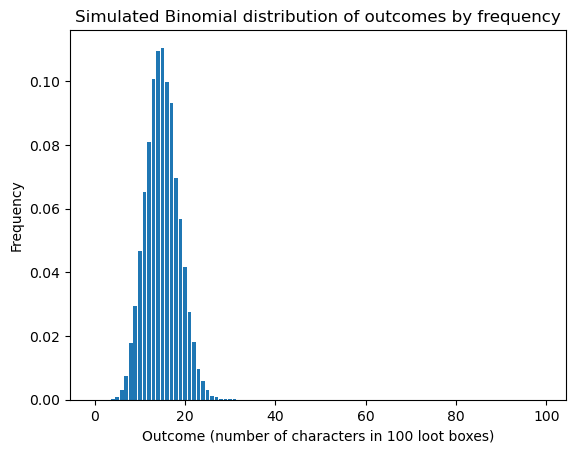

In [16]:
# bar plot
plt.title("Simulated Binomial distribution of outcomes by frequency")
plt.xlabel("Outcome (number of characters in 100 loot boxes)")
plt.ylabel("Frequency")
plt.bar(outcomes, outcome_props);

**Answer**:

In this simulations, the distribution of characters received from 100 loot boxes exhibits several key characteristics. First, it's centered around 15 characters, the expected value, in line with the 15% chance of getting a character per box. 

The distribution forms a bell-shaped curve, typical of binomial distributions with many trials, indicating that outcomes near the average are most common, with less likelihood for more extreme numbers. It shows symmetry around the central value, a usual feature of binomial distributions. 

The bar graph represent the discrete counts of characters, reflecting the discrete nature of the data. Despite 15 characters being the most probable outcome, there's noticeable variability, with some simulations yielding significantly different counts, which underscores the inherent randomness and uncertainty in each loot box opening.

#### 3g. Let's use the probability mass function (PMF) to answer the boss' question this time

Simulations are a great tool to have at our disposal, however they can be time consuming and processor intensive.

Thankfully, we can use our understanding of distributions to answer questions with ease! 

__"How do distributions make things easier?"__
- Distributions have a known shape and structure.
- So long as we know the parameters needed to construct the distribution, we can use proven math equations and functions to directly answer common questions.

We'll cover two common distribution functions in this lab: the __probability mass function (PMF)__ and the __cumulative distribution function (CDF)__
- The PMF describes the probability of a single given outcome occuring
- The CDF describes the probability of all outcomes _up to and including_ a given outcome occuring.

Import `scipy.stats` as `stats`

In [17]:
import scipy.stats as stats

__Create a binomial distribution using the required parameters to construct the distribution:__
- `n` = the number of trials (100, in our case) 
- `p`, the probability of success for each trial (15%, in our case)

In [18]:
# use stats.binom to create the distribution object
n = 100
p = 0.15

binom_loot = stats.binom(n, p)

#### Use the `.pmf` method to answer the boss' question; out of 100 loot boxes, what is the chance that a user gets 20 characters?

In [19]:
# call the .pmf method on the distribution object we just created
binom_loot.pmf(20)

0.04022449066141772

**Answer**:

Using the Probability Mass Function (PMF) of the binomial distribution, the chance that a user gets exactly 20 characters out of 100 loot boxes is approximately 4.02%. This provides a precise answer to the question based on the established properties of the binomial distribution.

#### 3h. Visualize the discrete distribution

- Create a range from 0 to 100 as a variable, `outcomes`, representing all possible outcomes of the random variable (the number of characters received from 100 loot boxes).
- Supply that range to the `.pmf` method and store the results as `outcome_probs`
    - _NOTE: the `.pmf` method can take a list and returns a list of probabilities for each outcome_
- Make a bar plot with `outcomes` as the x-axis and `outcome_probs` as the bar heights.

__What observations can you make about the distribution?__

In [20]:
outcomes = range(100)
outcome_probs = binom_loot.pmf(outcomes)

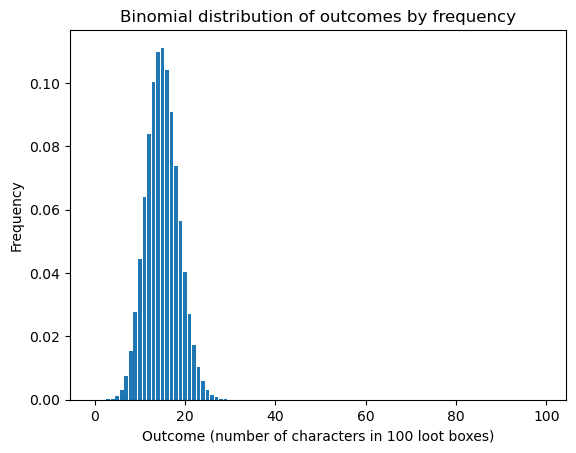

In [21]:
plt.title("Binomial distribution of outcomes by frequency")
plt.xlabel("Outcome (number of characters in 100 loot boxes)")
plt.ylabel("Frequency")
plt.bar(outcomes, outcome_probs);

**Answer**:

This bar plot showing the probability distribution for the number of characters received from 100 loot boxes reveals several key characteristics. The distribution peaks around 15 characters, in line with the 15% chance of receiving a character per box, indicating that this is the most likely outcome. 

The distribution is bell-shaped, which is typical for binomial distributions with many trials, and shows symmetry around this central value, suggesting that outcomes on either side of the expected value have similar probabilities. As it move away from the peak, the probability of outcomes decreases, highlighting that very low or high numbers of characters are less probable. 

The graph also clearly displays the discrete nature of the data, with each bar representing a distinct, whole-number count of characters, underscoring the discrete nature of the outcomes.

#### 4a. Our boss asks, "If a user earns 100 loot boxes, what is the chance the user gets _20 or fewer_ characters?" 

Let's use the probability mass function to answer the boss' question.

- Keep a running count of total probability
- Create loop from 0 up to 20 possible characters a user can get out of 100 loot boxes
    - for each loop, get the PMF of that count and add it to the running total

In [22]:
# Running total of probability for getting 20 or fewer characters
total_probability = 0

# Loop from 0 up to 20 to include all counts of possible characters a user can get
for count in range(21):  # Include 20
    total_probability += binom_loot.pmf(count)

total_probability


0.9336802341811179

__Out 100 loot boxes, what is the chance a user gets _20 or fewer_ characters?__

**Answer**:

The probability that a user gets 20 or fewer characters out of 100 loot boxes is approximately 93.37%. This is calculated by summing the probabilities of getting 0 to 20 characters, inclusive, using the Probability Mass Function (PMF) of the binomial distribution

#### 4b. Let's use the cumulative distribution function (CDF) to answer the boss' question this time. What is the probability of getting 20 or fewer characters out of 100 loot boxes? Does this answer match the previous answer? Why or why not?

In [23]:
# What is the probability of getting 20 or fewer characters out of 100 loot boxes?

probability_20_or_fewer = binom_loot.cdf(20)
probability_20_or_fewer


0.9336802341811185

**Answer**:

The probability of getting 20 or fewer characters out of 100 loot boxes, calculated using the Cumulative Distribution Function (CDF), is approximately 93.37%. This answer matches the previous answer obtained by summing up the individual probabilities from the Probability Mass Function (PMF) for 0 to 20 characters.

The reason why both methods yield the same result is that they are two different approaches to calculate the same probability. The CDF at a specific value gives the probability of the random variable being less than or equal to that value. In contrast, the PMF approach sums the probabilities of all individual outcomes up to that value. Both methods are mathematically sound and should, therefore, provide the same result for the same probability question.

#### 5. Our boss asks, "If a user earns 100 loot boxes, what is the chance the user gets __more than 20__ characters?"

Use the CDF to answer the boss. Recall that the total probability of all distributions is 1, or 100%.

In [24]:
# What is the probability of getting more than 20 characters out of 100 loot boxes?

probability_more_than_20 = 1 - binom_loot.cdf(20)
probability_more_than_20


0.06631976581888155

**Answer**:

The probability that a user gets more than 20 characters out of 100 loot boxes is approximately 6.63%. This is calculated by subtracting the probability of getting 20 or fewer characters (93.37%) from the total probability (100%). This approach utilizes the fact that the total probability for all possible outcomes in a distribution sums up to 1, or 100%.

### 6. Rapid Fire Questions!

Given how quickly you've been able to answer previous questions about the loot boxes, you're bosses have begun tossing questions left and right specifically about the rarest event possible, getting a `'super rare character'` out of 100 loot boxes. 

Create the distribution for getting a `'super rare character'` out of 100 loot boxes and be ready to answer 7 questions using the PMF and CDF.

- __Ensure you're using the correct probability of success `p` here.__ The chance for a `'super rare character'` is 1%, but that can only happen if the loot box contains a character - BOTH events must occur.

In [25]:
# create the distribution for a 'super rare character' occuring out of 100 loot boxes

p_super_rare = 0.15 * 0.01

# Number of trials (loot boxes)
n_loot_boxes = 100

# Create a binomial distribution for getting a 'super rare character' out of 100 loot boxes
super_rare_binom = stats.binom(n_loot_boxes, p_super_rare)

super_rare_binom

__What is the probability a user buys 100 loot boxes and they get zero super rare characters?__

In [26]:
# what is the probability a user buys 100 loot boxes and they get zero super rare characters?
# Calculate the probability of getting zero super rare characters out of 100 loot boxes
super_rare_binom.pmf(0)



0.8606110552963725

__What is the probability a user buys 100 loot boxes and they get a single super rare character?__

In [27]:
# what is the probability a user buys 100 loot boxes and they get a single super rare character?
super_rare_binom.pmf(1)


0.12928558667446755

__What is the probability a user buys 100 loot boxes and they two super rare characters?__

In [28]:
# what is the probability a user buys 100 loot boxes and they get two super rare characters?
super_rare_binom.pmf(2)

0.009613875624015254

__What is the probability a user buys 100 loot boxes and they get two or fewer super rare characters?__

In [29]:
# what is the probability a user buys 100 loot boxes and they get two or fewer super rare characters?
super_rare_binom.cdf(2)

0.9995105175948551

__What is the probability a user buys 100 loot boxes and they get more than two super rare characters?__

In [30]:
# what is the probability a user buys 100 loot boxes and they get more than two super rare characters?
1 - super_rare_binom.cdf(2)

0.0004894824051449032

__What is the probability a user buys 100 loot boxes and they get more than three super rare characters?__

In [31]:
# what is the probability a user buys 100 loot boxes and they get more than three super rare characters?
1 - super_rare_binom.cdf(3)

1.7694818187807826e-05

__What is the probability a user buys 100 loot boxes and they get 100 super rare characters?__

In [32]:
# what is the probability a user buys 100 loot boxes and they get 100 super rare characters?
super_rare_binom.pmf(100)

4.065611775352161e-283

### 7. Calculating Purchases

Using past data, we know on average users purchase 2.7 loot boxes per month. The total number of current users is 450,000.

#### 7a. Let's suppose a random variable  𝑋  counts up how many loot boxes a user will purchase within a month. What distribution is best suited for  𝑋 ? Why?

**Answer**:

The random variable X representing the number of loot boxes a user purchases in a month, fits well with a Poisson distribution. This is because the Poisson distribution is used for modeling scenarios where events occur with a known average rate (2.7 boxes per month) independently over time. The distribution is suitable for discrete events, and each loot box purchase is a separate, distinct event. Despite 2.7 purchases per month not being particularly rare, the Poisson distribution is still appropriate in the context of a large user base (450,000 users), as it effectively models the variability and independent nature of the purchasing behavior among this population.

#### 7b. Your boss asks "How many users will NOT purchase a loot box next month?"

- Establish the appropriate distribution from `stats` using the information given.
- Use the appropriate function (PMF vs. CDF) to calculate how many users (out of the total) will NOT purchase a loot box next month

In [33]:
pois_loot = 2.7

poisson_dist = stats.poisson(pois_loot)

# Probability of a user not purchasing a loot box (0 purchases in a month)
prob_no_purchase = poisson_dist.pmf(0)

# Total number of users
total_users = 450000

# Calculating the number of users who will NOT purchase a loot box next month
users_not_purchasing = prob_no_purchase * total_users
users_not_purchasing


30242.48073288739

**Answer**:

Based on the Poisson distribution with an average of 2.7 loot boxes purchased per user per month, it's estimated that approximately 30,242 users out of the total 450,000 will not purchase a loot box next month.

#### 7c. Your boss asks "How many users will purchase 3 or fewer loot boxes?"

In [34]:
# Probability of a user purchasing 3 or fewer loot boxes in a month
prob_three_or_fewer = poisson_dist.cdf(3)

# Calculating the number of users who will purchase 3 or fewer loot boxes next month
users_purchasing_three_or_fewer = prob_three_or_fewer * total_users
users_purchasing_three_or_fewer


321341.479027295

**Answer**:

Using Poisson distribution, it's estimated that approximately 321,341 users out of the total 450,000 will purchase 3 or fewer loot boxes next month. 

#### 7d. Your boss asks "How many users will purchase more than 3 loot boxes?"

In [35]:
# Probability of a user purchasing more than 3 loot boxes in a month
prob_more_than_three = 1 - prob_three_or_fewer

# Calculating the number of users who will purchase more than 3 loot boxes next month
users_purchasing_more_than_three = prob_more_than_three * total_users
users_purchasing_more_than_three


128658.52097270497

**Answer**:

Approximately 128,659 users out of the total 450,000 are estimated to purchase more than 3 loot boxes next month. This figure is derived by calculating the probability of purchasing more than 3 loot boxes and applying it to the entire user base.

#### 7e. Visualize the distribution

- Create a range from 0 to 15 as a variable, `outcomes`, representing SOME possible outcomes of the random variable (consider what the upper limit truly is).
- Supply that range to the `.pmf` method and store the results as `outcome_probs`
- Make a bar plot with `outcomes` as the x-axis and `outcome_probs` as the bar heights.

__What observations can you make about the distribution?__

In [36]:
outcomes = range(16)
outcome_probs = poisson_dist.pmf(outcomes)

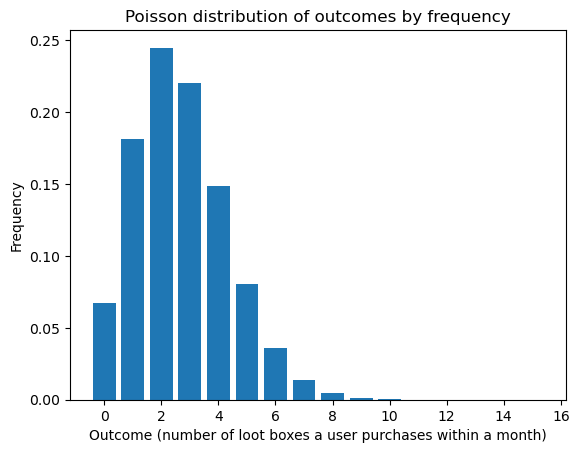

In [37]:
plt.title("Poisson distribution of outcomes by frequency")
plt.xlabel("Outcome (number of loot boxes a user purchases within a month)")
plt.ylabel("Frequency")
plt.bar(outcomes, outcome_probs);

**Answer**:

The Poisson distribution of loot box purchases peaks around 2 or 3, aligning closely with the average purchase rate of 2.7 per month. This peak indicates that it's most common for users to buy a few loot boxes. The distribution is asymmetric, with a tail that extends more towards higher purchase counts, suggesting a smaller but still significant likelihood of users making more than the average number of purchases. As the number of purchases increases, the probability gradually decreases, making it less likely for users to buy a large number of loot boxes, like 10 to 15. 

The distribution's discrete nature is evident, with each bar corresponding to the probability of an exact whole number of purchases, highlighting the distinct possibilities for the number of loot boxes bought by users.

## Resources
- [Probability Distributions for Artists](http://www.tylerlhobbs.com/writings/probability-distributions-for-artists): Use of probability distributions for generative art
- [Gacha calculator](https://dskjal.com/statistics/the-probability-of-gacha-calc-en.html)
- [Statistics and Pokemon](https://daily.pokecommunity.com/2017/07/05/the-numbers-game-shiny-and-perfect-pokemon/)

## BONUS - Revenue Calculation

Your boss is VERY interested in projecting how much revenue loot boxes will earn next month from "low value users". A low value user is a user who purchases less than 5 loot boxes.
- Assume there are 450,000 total users
- Users pay $1 for each loot they purchase
- Users purchase an average of 2.7 loot boxes per month
- __Consider which function is most appropriate here (PMF vs. CDF).__
    - If a user purchases 0 loot boxes, how much are they contributing to the total revenue? What about a user who purchases 4 loot boxes?

In [41]:
# Re-importing the Poisson distribution from scipy.stats
from scipy.stats import poisson

# Re-calculating the probabilities using the Poisson distribution
probabilities_recalc = poisson.pmf(k=[0, 1, 2, 3, 4], mu=average_loot_boxes)

# Re-calculating revenue for each group (0 to 4 loot boxes)
revenue_per_group_recalc = probabilities_recalc * np.array([0, 1, 2, 3, 4]) * price_per_box

# Re-calculating total revenue from low value users
total_revenue_low_value_users_recalc = np.sum(revenue_per_group_recalc * total_users)

# Probabilities and revenue breakdown
probabilities_recalc, revenue_per_group_recalc, total_revenue_low_value_users_recalc


(array([0.06720551, 0.18145488, 0.24496409, 0.22046768, 0.14881569]),
 array([0.        , 0.18145488, 0.48992819, 0.66140305, 0.59526275]),
 867621.9933736967)

## BONUS - The Geometric Distribution

The user `StrTrkLvr_CSchmitt` has her heart set on getting a super rare character. She will continue to buy and open loot boxes until she gets one (and stop purchasing, once she does). 

This situation calls for the __geometric distribution,__ which asks: how many "failure" trials occur prior to the first "success" trial?

The geometric distribution is appropriate when:
- Each trial is independent of one another
- The probability of success is a constant $p$
- The outcome is binary

In [42]:
from scipy.stats import geom

# Hypothetical probability of obtaining the super rare character per loot box
probability_of_success = 0.05  # 5%

# Expected number of loot boxes to open before obtaining the super rare character
expected_number_of_boxes = geom.mean(p=probability_of_success)

# Probability of obtaining the super rare character within the first 10 loot boxes
probability_within_10_boxes = geom.cdf(k=10, p=probability_of_success)

expected_number_of_boxes, probability_within_10_boxes


(20.0, 0.4012630607616211)

#### Visualize the distribution

- Create a geometric distribution using `stats.geom`
    - __Ensure you're using the correct probability of success `p` here.__ The chance for a `'super rare character'` is 1%, but that can only happen if the loot box contains a character (15%) - BOTH events must occur.
- Create a range from 0 to 2000 as a variable, `outcomes`, representing SOME possible outcomes of the random variable (consider what the upper limit truly is).
- Supply that range to the `.pmf` method and store the results as `outcome_probs`
- Make a bar plot with `outcomes` as the x-axis and `outcome_probs` as the bar heights.

In [48]:
# Probability of getting a character in a loot box
probability_character = 0.15  # 15%

# Probability of the character being 'super rare'
probability_super_rare = 0.01  # 1%

probability_combined = probability_character * probability_super_rare
geom_loot = geom(p=probability_combined)
outcomes = np.arange(0, 2001)
outcome_probs = geom.pmf(k=outcomes, p=probability_of_success)

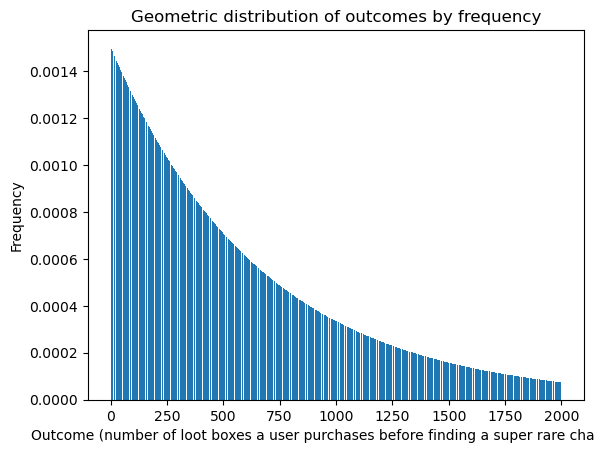

In [49]:
plt.title("Geometric distribution of outcomes by frequency")
plt.xlabel("Outcome (number of loot boxes a user purchases before finding a super rare character)")
plt.ylabel("Frequency")
plt.bar(outcomes, outcome_probs);

#### What is the probability the user will have to purchase 100 or fewer lootboxes before finding a super rare character?

In [50]:
# Probability of obtaining the super rare character in 100 or fewer loot boxes
probability_100_or_fewer = geom_loot.cdf(100)

probability_100_or_fewer


0.13938894470362773

**Answer**:

The probability that the user will have to purchase 100 or fewer loot boxes before finding a super rare character is approximately 13.94%. This means there is a 13.94% chance that the user will obtain the super rare character within the first 100 loot box openings.

#### What is the probability the user will have to purchase more than 100 lootboxes before finding a super rare character?

In [51]:
# Probability of needing to purchase more than 100 loot boxes before finding a super rare character
probability_more_than_100 = 1 - probability_100_or_fewer

probability_more_than_100


0.8606110552963723

**Answer**:

The probability that the user will have to purchase more than 100 loot boxes before finding a super rare character is approximately 86.06%. This indicates a high likelihood that the user will need to open more than 100 loot boxes to obtain the super rare character.

__Given your answer to the previous question, why might this strategy lead to customer burnout? What recommendation(s) would you suggest to your boss about preventing this burnout?__

**Answer**:

The strategy of relying heavily on loot boxes, especially when the probability of obtaining a highly desired item like a super rare character is very low (as illustrated by the 86.06% chance of not finding the character in the first 100 loot boxes), can lead to several issues that might cause customer burnout:

1. **Frustration from Low Success Rates**: Players may become frustrated or disillusioned due to the low probability of obtaining desired items. This can lead to a feeling of the game being unfair or too difficult.

2. **Financial Strain**: Continuously purchasing loot boxes can lead to significant financial expenditure. Players who spend a lot without receiving much in return might feel that the game is not worth their investment.

3. **Diminishing Returns and Satisfaction**: The excitement of opening loot boxes can diminish over time, especially if players repeatedly receive items of low value or interest to them.

4. **Addictive Behaviors**: This model can encourage addictive behaviors, as players might continually purchase loot boxes in the hope of finally obtaining the desired item. This can lead to unhealthy gaming habits.

To prevent customer burnout and foster a more positive gaming experience, I would recommend the following strategies to your boss:

1. **Increase Transparency**: Clearly communicate the odds of obtaining items from loot boxes. This transparency can help manage player expectations.

2. **Reward Consistency**: Implement a system where players are guaranteed to receive a valuable item after a certain number of loot boxes have been opened. This could be a "pity system" where a super rare item is guaranteed after, for example, 100 boxes.

3. **Diversify Acquisition Methods**: Offer alternative ways to obtain super rare characters, such as through gameplay achievements, events, or direct purchases. This can reduce the reliance on randomness and give players a sense of progression and control.

4. **Limit Spending**: Implement a system to limit the number of loot boxes a player can purchase within a certain time frame. This helps prevent excessive spending and encourages breaks from the game.

5. **Player Feedback**: Regularly gather and act on player feedback to adjust the system to be more player-friendly and less frustrating.

These recommendations aim to create a more balanced and player-friendly environment, reducing the risk of burnout and potentially increasing player retention and satisfaction.